Connect to LUSAS Modeller using the pywin32 module. <br>
Substitute the version number (here 21.0) for your current version. <br>
You must "Pip install" pywin32 to your python environment

In [39]:
import win32com.client as win32
lusas = win32.gencache.EnsureDispatch("Lusas.Modeller.21.0")
db = lusas.getDatabase()

Options/inputs

In [40]:
create_new_model = False   # Option to create a new model. Warning this will close the existing model without saving 
model_file_name = "Half Joint"

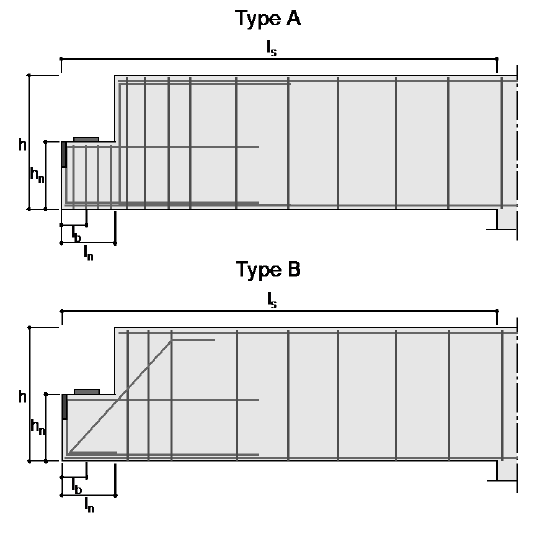

Dimensions in metres

In [41]:
ls = 4.0
h  = 1.0
hh = 0.5
ln = 0.5
cov = 0.05
mesh_size = h/5

In [42]:
if create_new_model:
    db = lusas.newDatabase("Structural", f"{model_file_name}.mdl")
    db.setAnalysisCategory("2D Inplane")
    db.setModelUnits("kN,m,t,s,C")
    db.setTimescaleUnits("Seconds")


In [43]:
geometryData = lusas.geometryData().setAllDefaults()
geometryData.setCreateMethod("coons")
geometryData.addCoords(0.0, 0.0, 0.0)
geometryData.addCoords(ln, 0.0, 0.0)
geometryData.addCoords(ln, hh, 0.0)
geometryData.addCoords(0.0, hh, 0.0)
geometryData.setLowerOrderGeometryType("coordinates")
db.createSurface(geometryData)

geometryData = lusas.geometryData().setAllDefaults()
geometryData.setCreateMethod("coons")
geometryData.addCoords(ln, 0.0, 0.0)
geometryData.addCoords((ls-ln), 0.0, 0.0)
geometryData.addCoords((ls-ln), hh, 0.0)
geometryData.addCoords(ln, hh, 0.0)
geometryData.setLowerOrderGeometryType("coordinates")
db.createSurface(geometryData)

geometryData = lusas.geometryData().setAllDefaults()
geometryData.setCreateMethod("coons")
geometryData.addCoords(ln, hh, 0.0)
geometryData.addCoords((ls-ln), hh, 0.0)
geometryData.addCoords((ls-ln), h, 0.0)
geometryData.addCoords(ln, h, 0.0)
geometryData.setLowerOrderGeometryType("coordinates")
db.createSurface(geometryData)



<win32com.gen_py.LUSAS Modeller ActiveX Script Language 21.0.IFObjectSet instance at 0x3026033095728>

In [44]:
attr = db.createMeshSurface("Plane Stress")
attr.setRegularSize("QPM4M", mesh_size, True)
attr.setValue("allowIrregular", True)
attr.assignToAll(lusas.assign().setAllDefaults())
db.updateMesh()

<win32com.gen_py.LUSAS Modeller ActiveX Script Language 21.0.IFDatabase instance at 0x3026033092896>

Define the reinforcement

In [ ]:
bar_broup = db.createEmptyGroup("Bars")

Set the display properties

In [45]:
lusas.view().setScaledToFit(True)
